<a href="https://colab.research.google.com/github/statistics-jun/2022-1-ESAA/blob/main/ESAA_Week5_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022-1 ESAA 5기 김혜준 개념 필사 - 0408(금) 5주차 과제
 
## <핸즈온 머신러닝>
## Chapter 9 비지도 학습

* 사용할 수 있는 데이터는 대부분 입력 특성 X는 있지만 레이블 y가 없음 -> 비지도 학습 필요
  - 군집(clustering) : 비슷한 샘플을 클러스터로 모음
  - 이상치 탐지(outlier detection) : '정상' 데이터가 어떻게 보이는지 학습 -> 비정상 샘플 감지에 사용
  - 밀도 추정(density estimation) : 데이터셋 생성 확률 과정의 확률 밀도 함수 추정 -> 이상치 탐지에 사용

### 9.1 군집
* 군집 : 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업
  - 각 샘플은 하나의 그룹에 할당
  - 다양한 애플리케이션에서 사용
    - 고객 분류 예) 추천 시스템
    - 데이터 분석
    - 차원 축소 기법
    - 이상치 탐지
    - 준지도 학습
    - 검색 엔진
    - 이미지 분할



#### 9.1.1 k-평균
* k-평균 알고리즘 : 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플 할당
  - 레이블 : 알고리즘이 샘플에 할당한 클러스터의 인덱스 (labels_)
  - 센트로이드(cluster_centers_)
* 클러스터의 크기가 많이 다르면 잘 작동하지 않음
* 하드 군집 : 샘플을 하나의 클러스터에 할당
* 소프트 군집 : 클러스터마다 샘플에 점수 부여
  - 샘플과 센트로이드 사이 거리 (transform() 메서드)
  - 유사도 또는 친화성 점수

In [9]:
import numpy as np

# 예제 데이터 생성
from sklearn.datasets import make_blobs
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5 ,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,cluster_std=blob_std, random_state=7)

In [10]:
# k-평균 알고리즘 훈련
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [11]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [12]:
y_pred is kmeans.labels_ # 훈련된 샘플의 레이블

True

In [13]:
kmeans.cluster_centers_ # 센트로이드 확인

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [14]:
# 새로운 샘플에 가장 가까운 센트로이드의 클러스터 할당
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [15]:
kmeans.transform(X_new) # 샘플과 각 센트로이드 사이의 거리

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

##### k-평균 알고리즘
* k개의 센트로이드를 랜덤하게 선정
* 샘플에 레이블 할당하고 업데이트하는 작업을 센트로이드가 변화하지 않을 때까지 반복

##### 센트로이드 초기화 방법
* init 매개변수에 센트로이드 리스트를 담은 넘파이 배열 지정 & n_init = 1
* 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행(n_init 조절 (기본값 10))하고 가장 좋은 솔루션 선택 -> 이너셔가 가장 낮은 모델 
  - 이너셔 : 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리 (inertia_)
    - score() : 이너셔의 음숫값

* 초기화 방식
  - init="k-means++" (기본값)
  - init="random"


In [16]:
kmeans.inertia_ # 이너셔

211.5985372581684

In [17]:
kmeans.score(X) # 이너셔의 음숫값 반환

-211.59853725816836

##### k-평균 속도 개선과 미니배치 k-평균
* k-평균 속도 개선 : 삼각 부등식 사용하여 불필요한 거리 계산 피함
  - algorithm="elkan" (기본값) cf) algorithm="full"(원래 알고리즘))

* 미니배치 k-평균 : 각 반복마다 미니배치를 사용해 센트로이드 조금씩 이동, 대량의 데이터셋에 적용 가능 (MiniBatchKMeans 클래스)
  - k-평균 알고리즘보다 속도는 더 빠르지만 이너셔는 더 나쁨

In [18]:
# 미니배치 k-평균
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

##### 최적의 클러스터 개수 찾기
* 실루엣 점수 : 모든 샘플에 대한 실루엣 계수의 평균 (silhouette_score())
  - 실루엣 계수 : (b - a) / max(a, b) => -1 ~ 1
    - a : 클러스터 내부의 평균 거리 / b : 가장 가까운 클러스터까지 평균 거리
    - +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있음
    - 0에 가까우면 클러스터 경계에 위치
    - -1에 가까우면 샘플이 잘못된 클러스터에 할당
* 실루엣 다이어그램 : 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그린 그래프
  - 높이 : 클러스터가 포함하고 있는 샘플의 개수
  - 너비 : 클러스터에 포함된 샘플의 정렬된 실루엣 계수
  - 수직 파선 : 각 클러스터 개수에 해당하는 실루엣 점수
   - 많은 샘플이 파선의 왼쪽에서 멈추면 나쁜 클러스터

In [19]:
# 실루엣 점수
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

#### 9.1.2 k-평균의 한계
* 알고리즘을 여러 번 실행 필요
* 클러스터 개수 지정 필요
* 입력 특성의 스케일 맞추는 것이 필요
* 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않음

  -> 타원형 클러스터에는 가우시안 혼합 모델이 잘 작동

#### 9.1.3 군집을 사용한 이미지 분할
* 이미지 분할 : 이미지응 세그먼트 여러 개로 분할하는 작업
* 시맨틱 분할 : 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당
* 색상 분할 : 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [25]:
# 이미지 읽기
from matplotlib.image import imread
image = imread (os.path.join("/content/drive/MyDrive/ESAA/2022-1/과제/개념 필사/0408(금) 5주차 과제_ 비지도 학습/", "ladybug.png"))
image.shape

(533, 800, 3)

In [26]:
X = image.reshape(-1, 3) # RGB 색상의 긴 리스트로 변환
# k-평균 알고리즘 적용
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

#### 9.1.4 군집을 사용한 전처리
* 차원 축소에 효과적

In [27]:
# 데이터셋 불러오기
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

In [28]:
# 훈련/테스트 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [31]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [32]:
# 테스트 세트에서 정확도 평가
log_reg.score(X_test, y_test)

0.9688888888888889

In [35]:
# k-평균 전처리 사용
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                     ("kmeans", KMeans(n_clusters=50, random_state=42)),
                     ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
                     ])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [36]:
# 분류 파이프라인 평가
pipeline.score(X_test, y_test)

0.9777777777777777

In [37]:
# 최적의 클러스터 개수 찾기
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=2; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.3s
[CV] END ...............................kmeans_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............................kmeans__n_clusters=55; total time=   8.5s
[CV] END ..............................kmeans__n_clusters=56; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=56; total time=   6.1s
[CV] END ..............................kmeans__n_clusters=56; total time=   6.9s
[CV] END ..............................kmeans__n_clusters=57; total time=   6.8s
[CV] END ..............................kmeans__n_clusters=57; total time=   8.5s
[CV] END ..............................kmeans__n_clusters=57; total time=   6.6s
[CV] END ..............................kmeans__n_clusters=58; total time=   7.3s
[CV] END ..............................kmeans__n_clusters=58; total time=   8.0s
[CV] END ..............................kmeans__n_clusters=58; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=59; total time=   7.1s
[CV] END ..............................kmeans__n_clusters=59; total time=   7.0s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [38]:
# 최선의 k값
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [39]:
# 파이프라인 성능
grid_clf.score(X_test, y_test)

0.9777777777777777

#### 9.1.5 군집을 사용한 준지도 학습
* 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용
  - 대표 이미지 : 각 클러스터에서 센트로이드에 가장 가까운 이미지
  - 레이블 전파 : 레이블을 동일한 클러스터에 있는 모든 샘플로 전파

In [40]:
# 레이블된 50개 샘플에 로지스틱 회귀 모델 훈련
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(multi_class='ovr', random_state=42)

In [41]:
# 테스트 세트에서 모델 성능 확인
log_reg.score(X_test, y_test)

0.8333333333333334

In [42]:
# 대표 이미지 찾기
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

**그림 9-13** 50개의 대표 숫자 이미지(클러스터당 한 개)

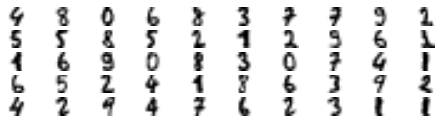



In [43]:
# 수동으로 레이블 할당
y_representative_digits = np.array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
                                    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
                                    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
                                    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
                                    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

In [44]:
# 성능이 조금이라도 높은지 확인
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

In [46]:
# 레이블 전파
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [47]:
# 모델 다시 훈련 및 성능 확인
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9333333333333333

In [48]:
# 센트로이드와 가까운 샘플의 20%에만 레이블 전파
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [49]:
# 부분 전파한 데이터셋에 모델 다시 훈련
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.94

In [50]:
# 실제 데이터와 비교
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

* 능동 학습 : 알고리즘이 요청할 때 특정 샘플의 레이블 제공
  - 불확실성 샘플링
  - 모델을 가장 크게 바꾸는 샘플에 대해 레이블 요청
  - 모델의 검증 점수를 가장 크게 떨어뜨리는 샘플에 대해 레이블 요청
  - 여러 개의 모델이 동일한 예측을 내지 않는 샘플에 대해 레이블 요청

#### 9.1.6 DBSCAN
* 밀집된 연속적 지역을 클러스터로 정의
* 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능
* 클러스터 인덱스가 -1이면 이상치
* core_sample_indices_ : 핵심 샘플의 인덱스
* components_ : 핵심 샘플
* fit_predict() 제공
  
  -> 새로운 샘플에 대해 클러스터 예측 불가

  -> 사용자가 필요한 예측기 선택

* 클러스터의 모양고 개수에 상관없이 감지
* 이상치에 안정적
* 하이퍼파라미터 두 개 (eps, min_samples)

In [51]:
# 반달 모양 데이터셋에서 테스트
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [52]:
dbscan.labels_ # 샘플 레이블

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [53]:
# 핵심 샘플 개수
len(dbscan.core_sample_indices_)

808

In [54]:
# 핵심 샘플 인덱스
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [55]:
# 핵심 샘플
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [56]:
# KNeighborsClassifier 훈련
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [57]:
# 클러스터 예측
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2])

In [58]:
# 각 클러스터에 대한 확률 추정
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [59]:
# 최대 거리 사용하여 두 클러스터에서 멀리 떨어진 샘플을 이상치로 분류
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  3, -1])

#### 9.1.7 다른 군집 알고리즘
* 병합 군집
  - 밑바닥부터 위로 쌓아 구성
  - 인접한 클러스터 쌍을 연결
  - 대규모 샘플과 클러스터에 잘 확장
  - 다양한 클러스터 감지 가능
  - 특정 클러스터 개수를 선택하는 데 도움이 되는 유용한 클러스터 트리를 만들 수 있음

* BIRCH
  - 제한된 메모리를 사용해 대용량 데이터셋 다룸
  - 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조 생성

* 평균 이동
  - 각 샘플을 중심으로 하는 원 안에 포함된 모든 샘플의 평균 계산 -> 원의 중심을 평균점으로 이동 -> 모든 원이 움직이지 않을 때까지 반복
  - 모양이나 개수에 상관없이 클러스터 찾을 수 있음
  - 하이퍼파라미터 적음 (bandwidth)
  - 국부적인 밀집도 추정에 의존
  - 대규모 데이터셋에는 적합하지 않음

* 유사도 전파
  - 투표 방식 사용
  - 크기가 다른 여러 개의 클러스터 감지 가능
  - 대규모 데이터셋에는 적합하지 않음

* 스펙트럼 군집
  - 샘플 사이의 유사도 행렬을 받아 저차원 임베딩 생성 -> 차원 축소
  - 복잡한 클러스터 구조 감지하고 그래프 컷을 찾는 데 사용
  - 샘플 개수가 많거나, 클러스터의 크기가 매우 다르면 잘 동작하지 않음



### 9.2 가우시안 혼합
* 가우시안 혼합 모델 : 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델
  - 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성
  - 일반적으로 클러스터는 타원형
* GaussianMixture 클래스
  - 사전에 가우시안 분포 개수 k 알아야 함
  - 기댓값-최적화(EM) 알고리즘 사용 - 소프트 클러스터 할당 이용
    - 기댓값 단계 : 샘플을 클러스터에 할당
    - 최대화 단계 : 클러스터 업데이트
      - 책임 : 클러스터에 속할 추정 확률
  - 새로운 샘플 예측
    - predict() : 하드 군집
    - predict_proba() : 소프트 군집
  - 생성 모델 : 새로운 샘플 생성 가능 (sample)
  - 밀도 추정 : score_samples() - 확률 밀도 함수의 로그 예측

In [60]:
# 데이터 생성
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [61]:
# 가우시안 혼합 모델 훈련
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [62]:
# 추정한 파라미터 확인
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [63]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [64]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [65]:
gm.converged_ # 알고리즘 수렴 여부

True

In [66]:
gm.n_iter_ # 반복 횟수

4

In [67]:
gm.predict(X) # 하드 군집

array([0, 0, 1, ..., 2, 2, 2])

In [68]:
gm.predict_proba(X) # 소프트 군집

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

In [69]:
# 생성 모델
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [70]:
y_new

array([0, 0, 1, 2, 2, 2])

In [71]:
gm.score_samples(X) # 로그 PDF 추정

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

* 특성이나 클러스터가 많거나 샘플이 적을 때 학습할 파라미터 개수 제한 필요
  - 클러스터의 모양과 방향의 범위 제한 : 공분산 행렬에 제약 추가
    - covariance_type
      - "full" : 기본값, 모양, 크기, 방향에 제약 없음 
      - "spherical" : 모든 클러스터가 원형, 지름은 다를 수 있음(분산이 다름)
      - "diag" : 크기 상관없이 타원형, 타원 축은 좌표 축과 나란(공분산 행렬이 대각 행렬)
      - "tied" : 모든 클러스터가 동일한 타원 모양, 크기, 방향(동일한 공분산 행렬 공유)



#### 9.2.1 가우시안 혼합을 사용한 이상치 탐지
* 이상치 탐지 : 보통과 많이 다른 샘플을 감지하는 작업
  - 이상치 : 밀도가 낮은 지역에 있는 모든 샘플
  
    -> 밀도 임곗값
    - 거짓 양성 많으면 임곗값 낮츰
    - 거짓 음성 많으면 임곗값 높임

* 특이치 감지 : 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련


In [72]:
# 밀도 임곗값 4%를 이용하여 이상치 구분
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

#### 9.2.2 클러스터 개수 선택하기
* BIC, AIC와 같은 이론적 정보 기준을 최소화하는 모델

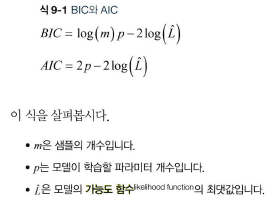

* 학습할 파라미터가 많은 모델에 벌칙, 데이터를 잘 학습하는 모델에 보상
* BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한 경향

In [73]:
gm.bic(X) # BIC

8189.747000497186

In [74]:
gm.aic(X) # AIC

8102.521720382148

#### 9.2.3 베이즈 가우시안 혼합 모델
* BayesianGaussianMixture 클래스 : 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만듦
  - n_components : 최적의 클러스터 개수보다 크다고 믿을 만한 값을 지정

In [75]:
# 베이즈 가우시안 혼합 모델
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [76]:
np.round(bgm.weights_, 2) # 가중치 확인

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘
* PCA(그리고 inverse_transform() 메서드를 가진 다른 차원 축소 기법) : 보통 샘플의 재구성 오차와 이상치의 재구성 오차 중 후자가 훨씬 큼, 매우 효과적인 이상치 탐지 기법
* Fast-MCD : EllipticEnvelope 클래스에서 구현, 이상치 탐지에 유용, 데이터셋 정제 시 사용, 타원형을 잘 추정
* 아이솔레이션 포레스트 : 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘, 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트 생성
* LOF : 이상치 탐지에 좋음, 주어진 샘플 주위의 밀도와 이웃 주위의 밀도 비교
* one-class SVM : 특이치 탐지에 적합, 조정할 하이퍼파라미터가 적음, 고타원 데이터셋에 잘 작동, 대구모 데이터셋으로의 확장은 어려움